# Importing data
> source:
* https://www.kaggle.com/datasets/sid321axn/malicious-urls-dataset/data
* Phistank

We want to combine these two datasets to have more data

In [ ]:
import pandas as pd

In [ ]:
data1 = pd.read_csv("/content/malicious_phish.csv")
data2 = pd.read_csv("/content/verified_online.csv")

# Cleaning the first dataset

In [ ]:
data1.info()
data1.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 651191 entries, 0 to 651190
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   url     651191 non-null  object
 1   type    651191 non-null  object
dtypes: object(2)
memory usage: 9.9+ MB


,url,type
0,br-icloud.com.br,phishing
1,mp3raid.com/music/krizz_kaliko.html,benign
2,bopsecrets.org/rexroth/cr/1.htm,benign
3,http://www.garage-pirenne.be/index.php?option=...,defacement
4,http://adventure-nicaragua.net/index.php?optio...,defacement


In [ ]:
data1.type.unique()

array(['phishing', 'benign', 'defacement', 'malware'], dtype=object)

In [ ]:
# Only keep benign and phishing

keep = ['phishing', 'benign']
data1_filtered = data1[data1['type'].isin(keep)].copy()

In [ ]:
data1_filtered.info()
data1_filtered.type.unique()

<class 'pandas.core.frame.DataFrame'>
Index: 522214 entries, 0 to 651190
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   url     522214 non-null  object
 1   type    522214 non-null  object
dtypes: object(2)
memory usage: 12.0+ MB


array(['phishing', 'benign'], dtype=object)

In [ ]:
# change to binary values
binarize = {'benign': 0, 'phishing': 1}
data1_filtered['type'] = data1_filtered['type'].map(binarize)

In [ ]:
data1_filtered.type.unique()

array([1, 0])

In [ ]:
data1_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 522214 entries, 0 to 651190
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   url     522214 non-null  object
 1   type    522214 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 12.0+ MB


In [ ]:
data1_filtered.type.value_counts()

,count
type,
0,428103
1,94111


# Cleaning the second dataset

In [ ]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56022 entries, 0 to 56021
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   phish_id           56022 non-null  int64 
 1   url                56022 non-null  object
 2   phish_detail_url   56022 non-null  object
 3   submission_time    56022 non-null  object
 4   verified           56022 non-null  object
 5   verification_time  56022 non-null  object
 6   online             56022 non-null  object
 7   target             56022 non-null  object
dtypes: int64(1), object(7)
memory usage: 3.4+ MB


In [ ]:
# Since this dataset have only phishing,
# we can simply just add a new column of 1 value (1=phishing)
# then we can only get the url and type columns

data2['type'] = 1
data2_filtered = data2[['url','type']].copy()

In [ ]:
data2_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56022 entries, 0 to 56021
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   url     56022 non-null  object
 1   type    56022 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 875.5+ KB


# Combining the two dataset

In [ ]:
# combining both should result to:

print(f"total entries: {len(data1_filtered) + len(data2_filtered)}")

total entries: 578236


In [ ]:
# combine filtered data1 and data2

combined_data = pd.concat([data1_filtered, data2_filtered], ignore_index=True)

In [ ]:
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 578236 entries, 0 to 578235
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   url     578236 non-null  object
 1   type    578236 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 8.8+ MB


# Cleaning the combined dataset

In [ ]:
# Check for duplicates

combined_data.duplicated().sum()

np.int64(92)

In [ ]:
# Remove the 92 duplicated entries
# Then reset the index

combined_data = combined_data.drop_duplicates().reset_index(drop=True)

In [ ]:
combined_data.duplicated().sum()

np.int64(0)

In [ ]:
# Check the whole data
combined_data.info()
combined_data.sample(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 578144 entries, 0 to 578143
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   url     578144 non-null  object
 1   type    578144 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 8.8+ MB


,url,type
537869,http://secure-officiel.com,1
310851,paymentidaccepted-courts-paypal.com,1
3829,dragonboatbc.ca/the-rio-tinto-alcan-dragon-boa...,0
311800,https://twitter.com/home?status=%E3%83%8C%E3%8...,0
245413,adwordls-account.site,1
365387,youtube.com/watch?v=DlzxTnCc0T0,0
262904,youtube.com/watch?v=gk8wsFarNbk,0
20346,encyclopedia.com/topic/San_Francisco.aspx,0
304806,dcdancenet.com/moredancing/contraecd.html,0
415274,http://100golosv.byethost8.com/?i=1,1


In [ ]:
combined_data['type'].unique()

array([1, 0])

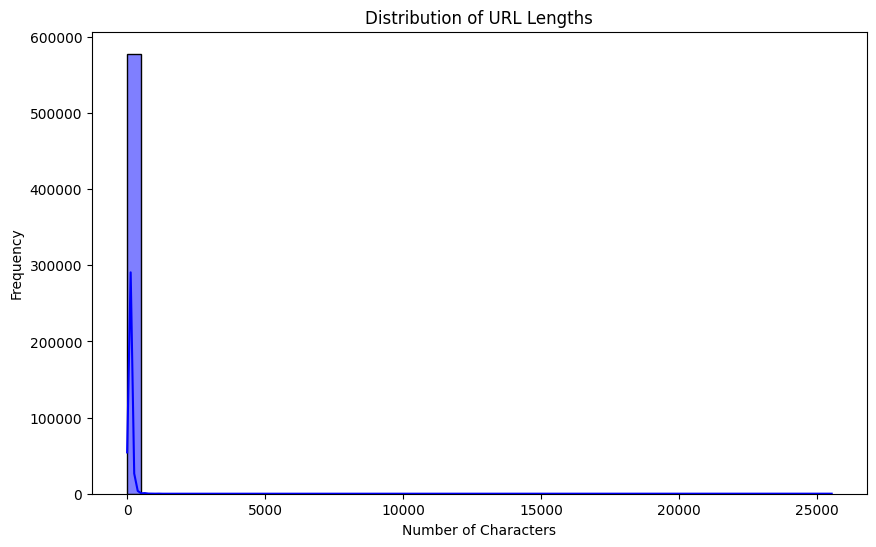

In [ ]:
# checking to see the lengths of each urls and the distribution
# to see if there is any outliers
# this will add new column as a placeholder that will be removed later

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

combined_data['url_len'] = combined_data.url.str.len()

plt.figure(figsize=(10, 6))
sns.histplot(combined_data['url_len'], bins=50, kde=True, color='blue')

plt.title('Distribution of URL Lengths')
plt.xlabel('Number of Characters')
plt.ylabel('Frequency')
plt.show()

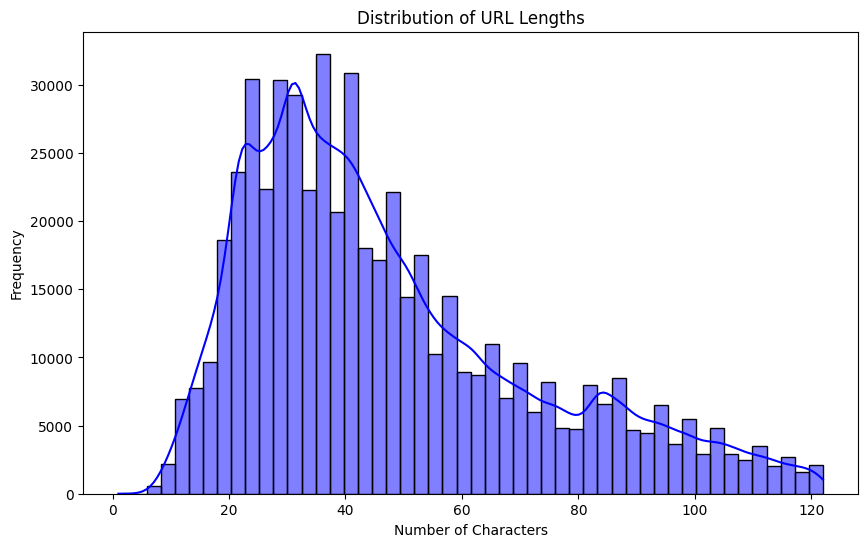

In [ ]:
# Remove the outlier by trimming the IQR, then plot again

Q1 = combined_data['url_len'].quantile(0.25)
Q3 = combined_data['url_len'].quantile(0.75)
IQR = Q3 - Q1

combined_data = combined_data[~((combined_data['url_len'] < (Q1 - 1.5 * IQR)) |(combined_data['url_len'] > (Q3 + 1.5 * IQR)))]

plt.figure(figsize=(10, 6))
sns.histplot(combined_data['url_len'], bins=50, kde=True, color='blue')

plt.title('Distribution of URL Lengths')
plt.xlabel('Number of Characters')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# remove the placeholder column

combined_data = combined_data.drop('url_len', axis=1)

In [ ]:
# seems, okay now but check info again to be safe

combined_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 543827 entries, 0 to 578143
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   url     543827 non-null  object
 1   type    543827 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 12.4+ MB


In [ ]:
# Check the number of each types

combined_data.type.value_counts()

,count
type,
0,405181
1,138646


In [ ]:
# Separating the types

benign = combined_data[combined_data['type'] == 0]
phishing = combined_data[combined_data['type'] == 1]

print(f"benign: {benign.shape[0]}, phishing: {phishing.shape[0]}")

benign: 405181, phishing: 138646


In [ ]:
# Because the distribution of the types is unbalanced,
# We would have to downsample it to match the size of the lesser

benign_reduced = benign.sample(n=len(phishing), random_state=42)
len(benign_reduced)

138646

In [ ]:
# Combine and shuffle the splitted classes

data_balance = pd.concat([benign_reduced, phishing]).sample(frac=1, random_state=42)
data_balance.info()

<class 'pandas.core.frame.DataFrame'>
Index: 277292 entries, 552290 to 206460
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   url     277292 non-null  object
 1   type    277292 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 6.3+ MB


In [ ]:
data_balance.head()

,url,type
552290,https://wehjrjsgwferthshrgefseth-qwaesreqewrae...,1
528268,https://kl7uood1gew3k2-kl7uood1gew3k2.fordcomm...,1
34894,muwaa.org/,0
328309,amazon.com/So-Far-Susan-Egan/dp/B0000630BP,0
359373,http://nymag.com/daily/intelligencer/2015/05/d...,0


In [ ]:
# reset index
data_balance = data_balance.reset_index(drop=True)

In [ ]:
data_balance.head()

,url,type
0,https://wehjrjsgwferthshrgefseth-qwaesreqewrae...,1
1,https://kl7uood1gew3k2-kl7uood1gew3k2.fordcomm...,1
2,muwaa.org/,0
3,amazon.com/So-Far-Susan-Egan/dp/B0000630BP,0
4,http://nymag.com/daily/intelligencer/2015/05/d...,0


In [ ]:
data_balance['type'].value_counts()

,count
type,
1,138646
0,138646


In [ ]:
# then save the data to csv so we can skip this part
data_balance.to_csv('phishing_data_clean.csv', index=False)

# Splitting the combined dataset

In [2]:
# import the cleaned data to make sure
import pandas as pd

data_clean = pd.read_csv('phishing_data_clean.csv')

In [3]:
data_clean.info()
data_clean['type'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277292 entries, 0 to 277291
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   url     277292 non-null  object
 1   type    277292 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 4.2+ MB


,count
type,
1,138646
0,138646


In [5]:
# then split into train and test (80-20 ratio)

from sklearn.model_selection import train_test_split

X = data_clean.url.values
y = data_clean['type'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=data_clean['type'], random_state=42)

# Creating the model
> The model is 1D CNN, created in tensorflow.

> Because the data we want to feed is in strings, we want to utilize the TextVectorization function of tensorflow. This function will process strings, in this case the url column, to vector values. This process is also known as tokenizing. We also have to apply padding to equalize the length of the vector, which is also available in TextVectorization.

In [6]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping

In [7]:
# before transforming the url, we have to know the maximum length of the string
# this is for the value that we will input inside the padding

padding_len = data_clean.url.str.len().max()
padding_len

122

In [8]:
# Transforming the url strings to numeric vector

vectorize_layer = layers.TextVectorization(
    standardize=None,
    split='character',
    output_mode='int',
    output_sequence_length=padding_len
)

vectorize_layer.adapt(X_train)

In [9]:
# Building the CNN Model

model = models.Sequential([

    layers.Input(shape=(1,), dtype=tf.string),
    vectorize_layer,
    layers.Embedding(input_dim=len(vectorize_layer.get_vocabulary()), output_dim=64),
    layers.Conv1D(128, kernel_size=5, activation='relu'),
    layers.GlobalMaxPooling1D(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ text_vectorization              │ (None, 122)            │             0 │
│ (TextVectorization)             │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding (Embedding)           │ (None, 122, 64)        │        17,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d (Conv1D)                 │ (None, 118, 128)       │        41,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d            │ (None, 128)            │             0 │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 66,433 (259.50 KB)

 Trainable params: 66,433 (259.50 KB)

 Non-trainable params: 0 (0.00 B)

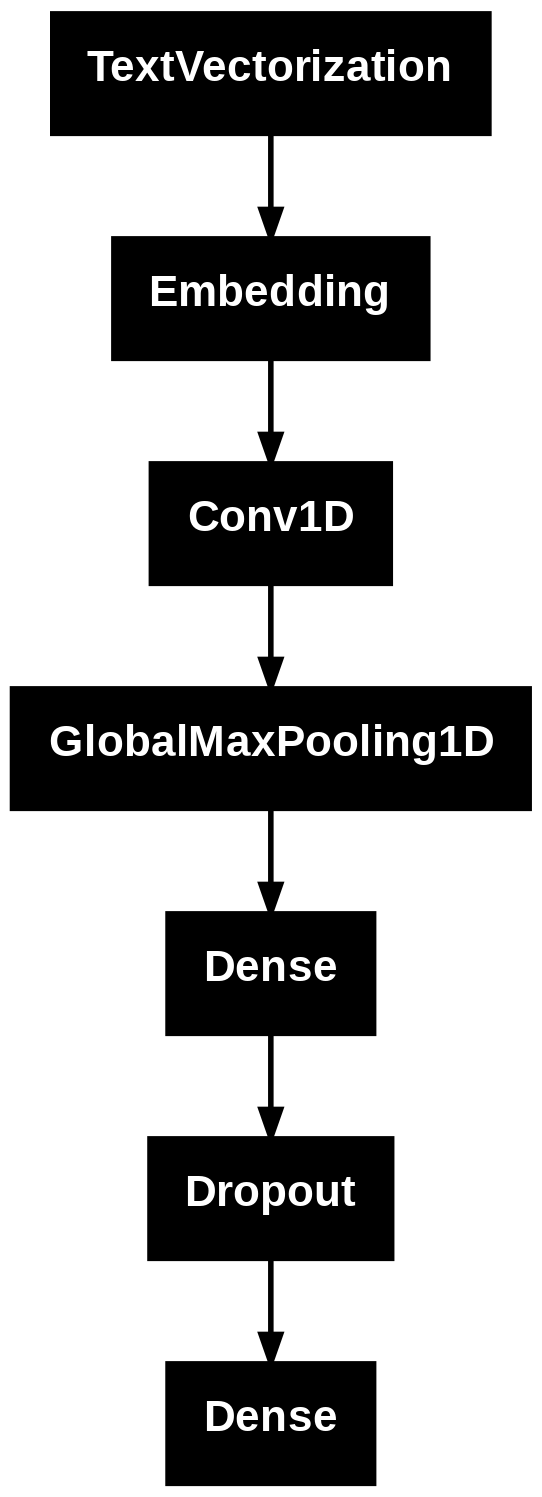

In [10]:
from tensorflow.keras.utils import plot_model

plot_model(model)

# Training the model

In [11]:
early_stop = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, callbacks=[early_stop])

Epoch 1/20
6933/6933 ━━━━━━━━━━━━━━━━━━━━ 74s 10ms/step - accuracy: 0.9368 - loss: 0.1689 - val_accuracy: 0.9635 - val_loss: 0.1003
Epoch 2/20
6933/6933 ━━━━━━━━━━━━━━━━━━━━ 70s 10ms/step - accuracy: 0.9692 - loss: 0.0874 - val_accuracy: 0.9707 - val_loss: 0.0824
Epoch 3/20
6933/6933 ━━━━━━━━━━━━━━━━━━━━ 67s 10ms/step - accuracy: 0.9743 - loss: 0.0723 - val_accuracy: 0.9677 - val_loss: 0.0887
Epoch 4/20
6933/6933 ━━━━━━━━━━━━━━━━━━━━ 68s 10ms/step - accuracy: 0.9771 - loss: 0.0642 - val_accuracy: 0.9739 - val_loss: 0.0723
Epoch 5/20
6933/6933 ━━━━━━━━━━━━━━━━━━━━ 69s 10ms/step - accuracy: 0.9791 - loss: 0.0576 - val_accuracy: 0.9752 - val_loss: 0.0706
Epoch 6/20
6933/6933 ━━━━━━━━━━━━━━━━━━━━ 67s 10ms/step - accuracy: 0.9801 - loss: 0.0541 - val_accuracy: 0.9743 - val_loss: 0.0765
Epoch 7/20
6933/6933 ━━━━━━━━━━━━━━━━━━━━ 68s 10ms/step - accuracy: 0.9823 - loss: 0.0481 - val_accuracy: 0.9752 - val_loss: 0.0718
Epoch 8/20
6933/6933 ━━━━━━━━━━━━━━━━━━━━ 67s 10ms/step - accuracy: 0.9831 -

# Exporting to usable files

In [13]:
import json

# Save vocab and the model
with open("url_vocab.json", "w") as f: json.dump(vectorize_layer.get_vocabulary(), f)
model.save('phishing_hook.keras')